In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Content Analysis
Target visualization:

In [2]:
pd.set_option("display.max_row",111)
pd.set_option('display.max_column',111)

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges']=pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df.dtypes.value_counts()

object     17
int64       2
float64     2
Name: count, dtype: int64

<Axes: ylabel='count'>

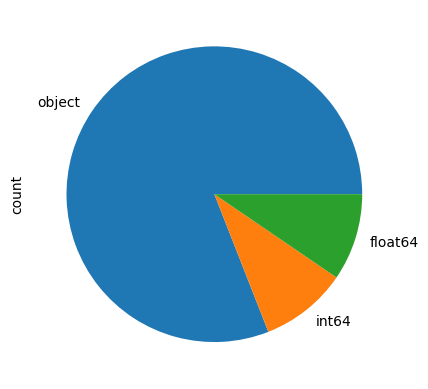

In [9]:
df.dtypes.value_counts().plot.pie()

In [10]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<Axes: >

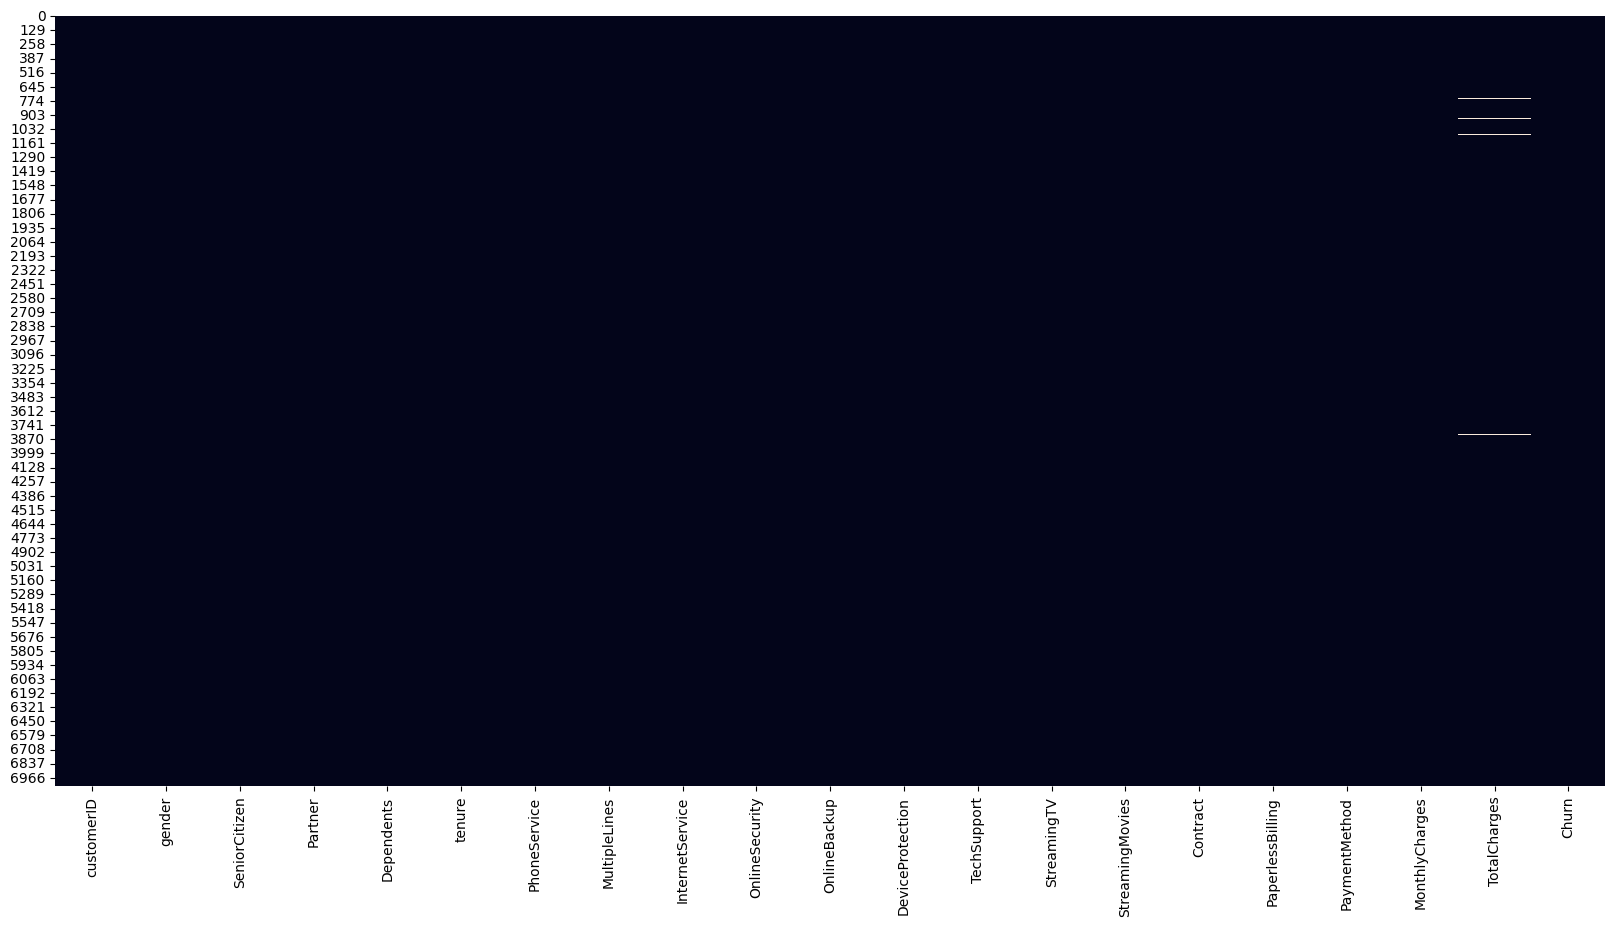

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

customerID          0.000000
MonthlyCharges      0.000000
PaymentMethod       0.000000
PaperlessBilling    0.000000
Contract            0.000000
StreamingMovies     0.000000
StreamingTV         0.000000
TechSupport         0.000000
DeviceProtection    0.000000
OnlineBackup        0.000000
InternetService     0.000000
MultipleLines       0.000000
PhoneService        0.000000
tenure              0.000000
Dependents          0.000000
Partner             0.000000
SeniorCitizen       0.000000
gender              0.000000
OnlineSecurity      0.000000
Churn               0.000000
TotalCharges        0.001562
dtype: float64

In [13]:
df.dropna(inplace=True)

In [14]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

## Quantitative Value Visualization

MonthlyCharges
TotalCharges


<Figure size 640x480 with 0 Axes>

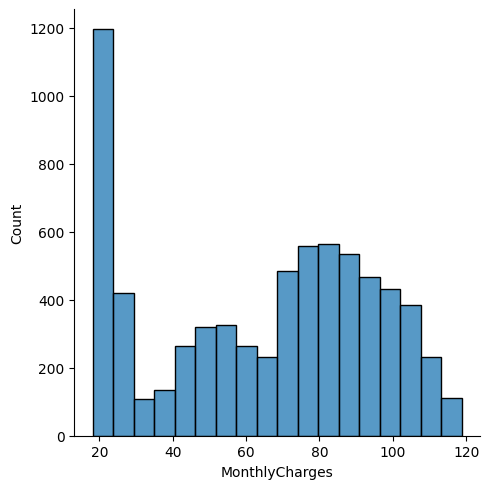

<Figure size 640x480 with 0 Axes>

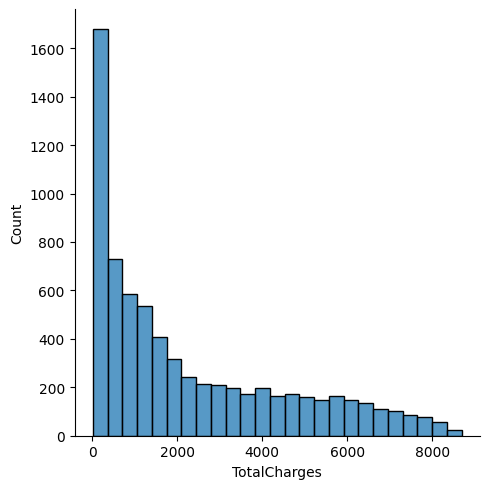

In [15]:
for col in df.select_dtypes('float'):
    print(col)
    plt.figure()
    sns.displot(df[col],kind="hist")

In [16]:
df['MonthlyCharges'].value_counts().sort_index()

MonthlyCharges
18.25     1
18.40     1
18.55     1
18.70     2
18.75     1
         ..
118.20    1
118.35    1
118.60    2
118.65    1
118.75    1
Name: count, Length: 1584, dtype: int64

In [17]:
df.drop('customerID',axis=1,inplace=True)

In [18]:
df['TotalCharges'].value_counts().sort_index()

TotalCharges
18.80      1
18.85      2
18.90      1
19.00      1
19.05      1
          ..
8564.75    1
8594.40    1
8670.10    1
8672.45    1
8684.80    1
Name: count, Length: 6530, dtype: int64

SeniorCitizen
tenure


<Figure size 640x480 with 0 Axes>

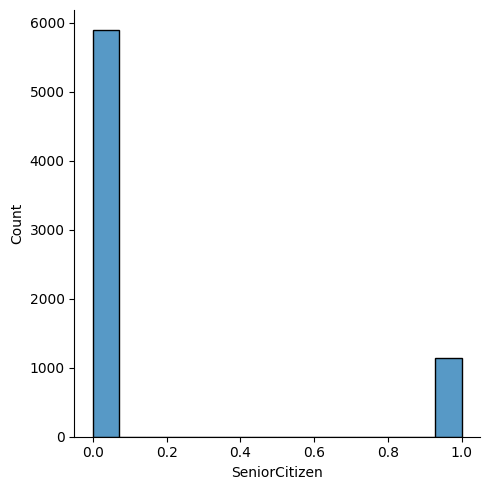

<Figure size 640x480 with 0 Axes>

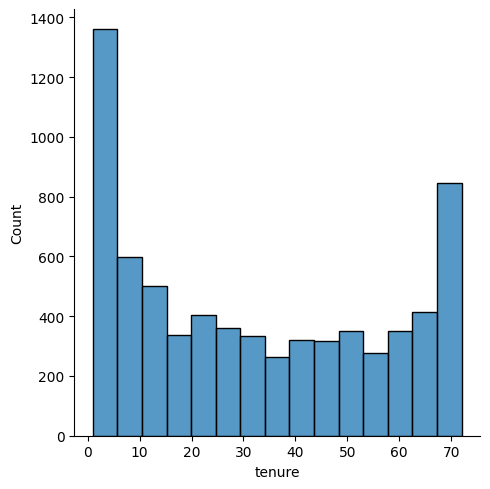

In [19]:
for col in df.select_dtypes('int'):
    print(col)
    plt.figure()
    sns.displot(df[col])


In [20]:
df['SeniorCitizen'].value_counts(normalize=True)

SeniorCitizen
0    0.8376
1    0.1624
Name: proportion, dtype: float64

## Qualitative variable Visualization

In [21]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].unique()}')

gender-------------------------------------------- ['Female' 'Male']
Partner------------------------------------------- ['Yes' 'No']
Dependents---------------------------------------- ['No' 'Yes']
PhoneService-------------------------------------- ['No' 'Yes']
MultipleLines------------------------------------- ['No phone service' 'No' 'Yes']
InternetService----------------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity------------------------------------ ['No' 'Yes' 'No internet service']
OnlineBackup-------------------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection---------------------------------- ['No' 'Yes' 'No internet service']
TechSupport--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingTV--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingMovies----------------------------------- ['No' 'Yes' 'No internet service']
Contract------------------------------------------ ['Month-to-

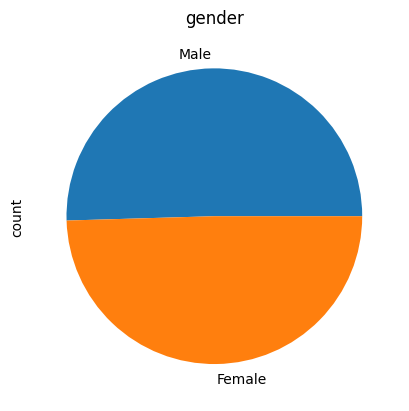

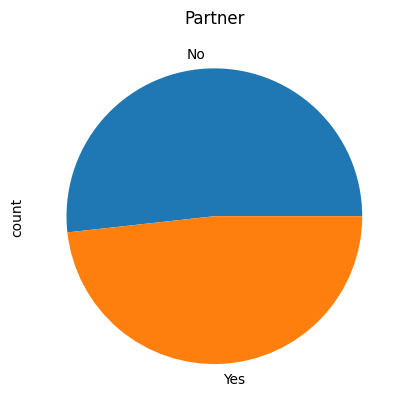

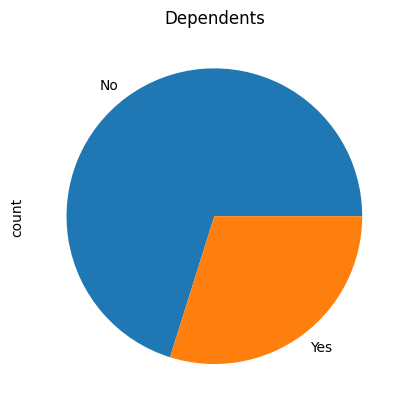

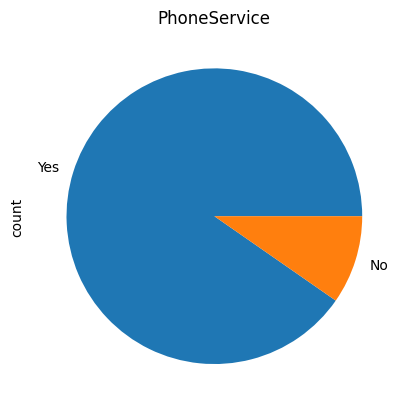

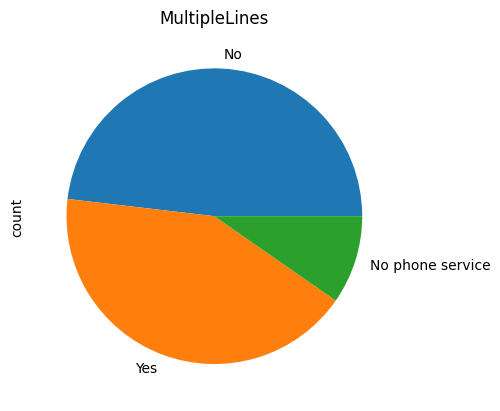

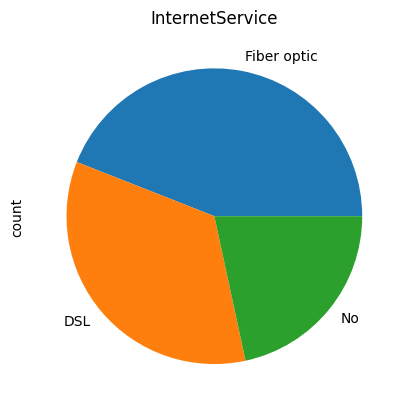

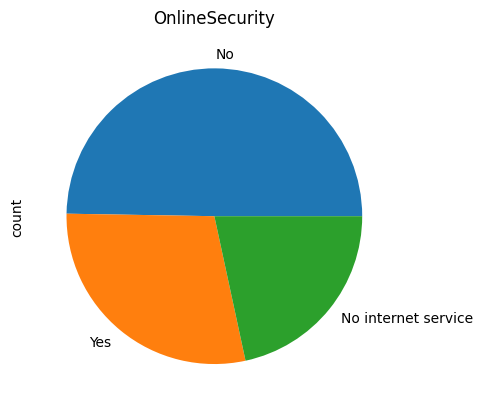

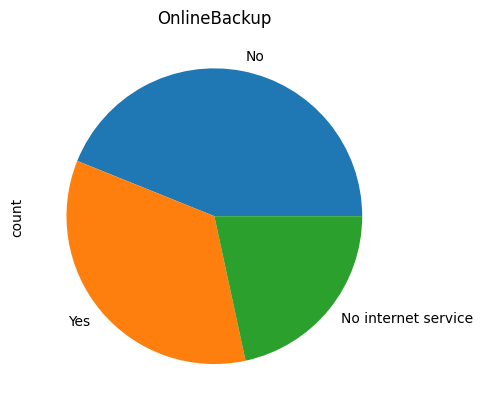

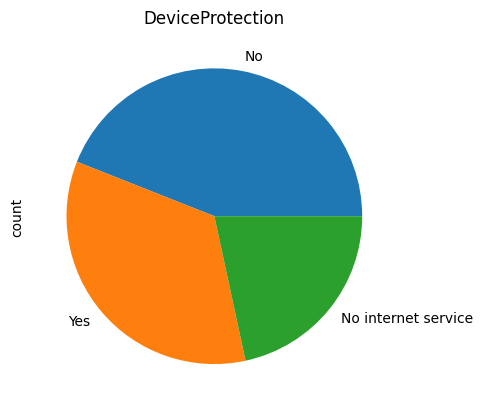

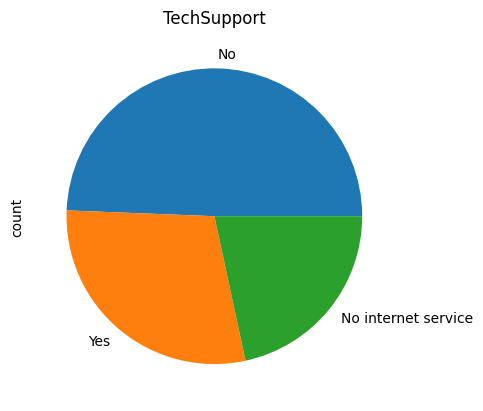

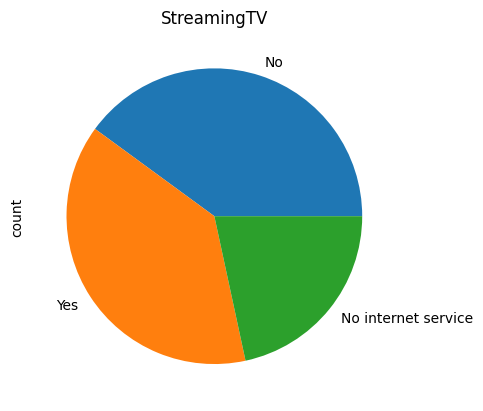

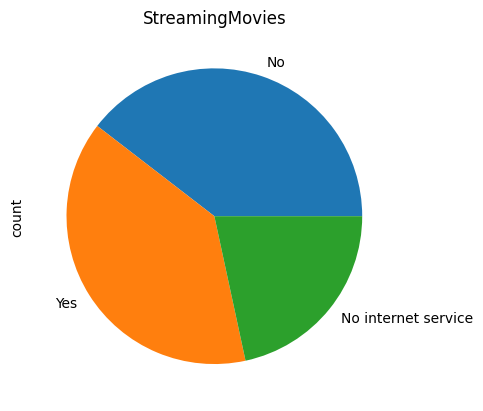

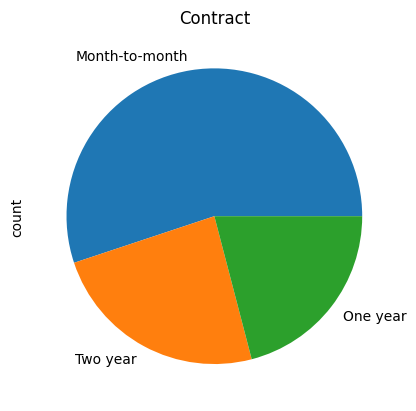

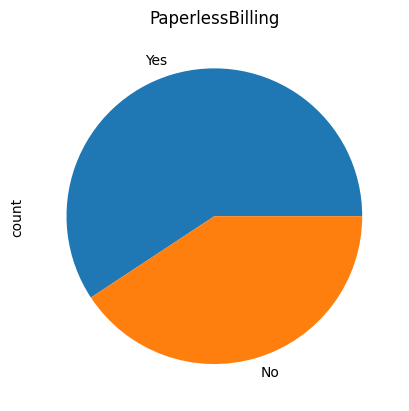

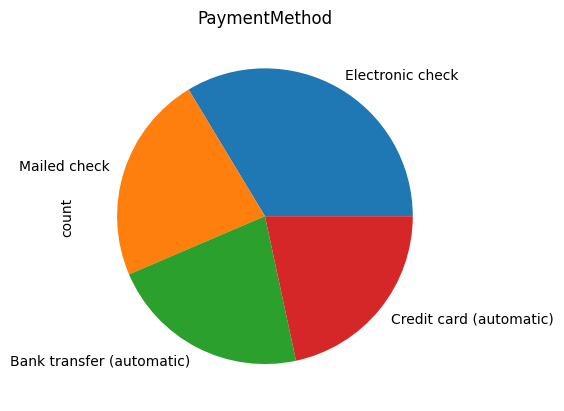

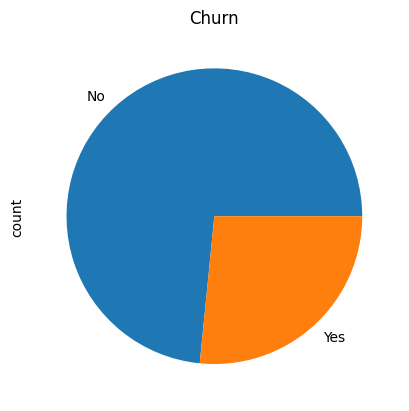

In [23]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)

### Target /value

In [24]:
df_churn=df[df['Churn']=='Yes']
df_notChurn=df[df['Churn']=='No']
df_churn.head(5)
df_notChurn.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


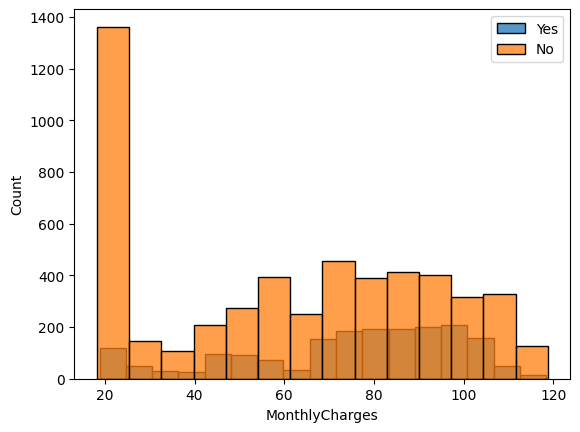

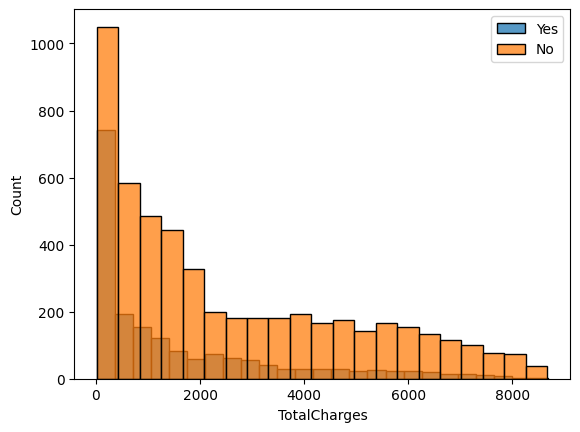

In [25]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df_churn[col],label='Yes' )
    sns.histplot(df_notChurn[col],label='No')
    plt.legend()

## Target / Age

<Axes: xlabel='SeniorCitizen', ylabel='count'>

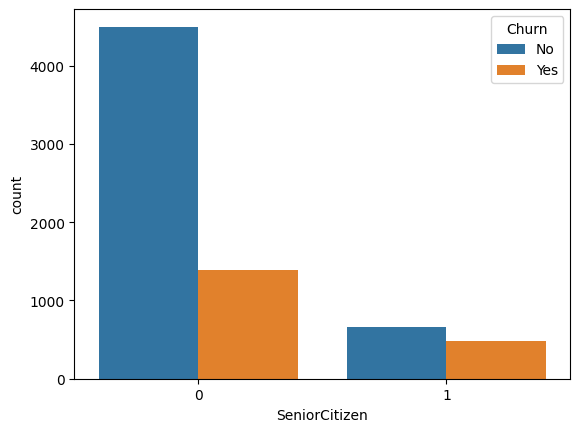

In [26]:
sns.countplot(x="SeniorCitizen",hue="Churn",data=df)

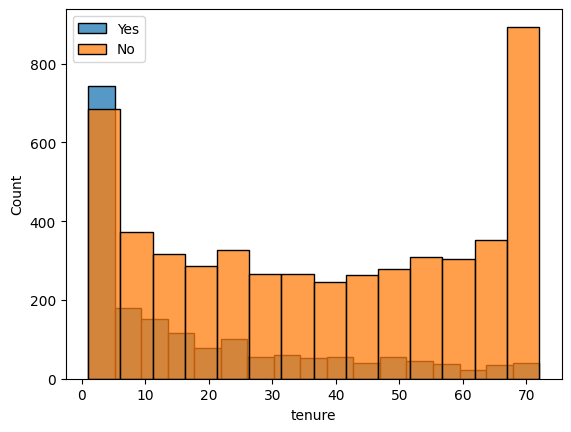

In [27]:
sns.histplot(df_churn['tenure'],label="Yes")
sns.histplot(df_notChurn['tenure'],label="No")
plt.legend()

## Target Qualitative

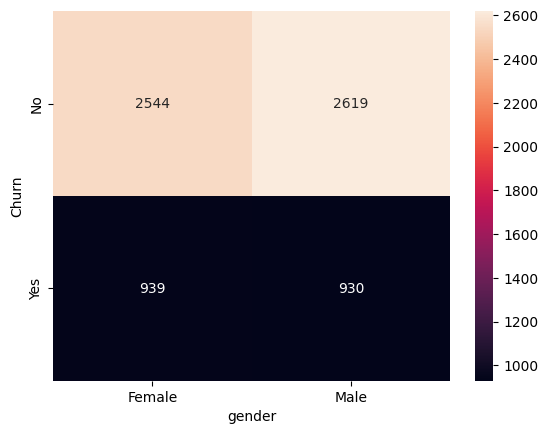

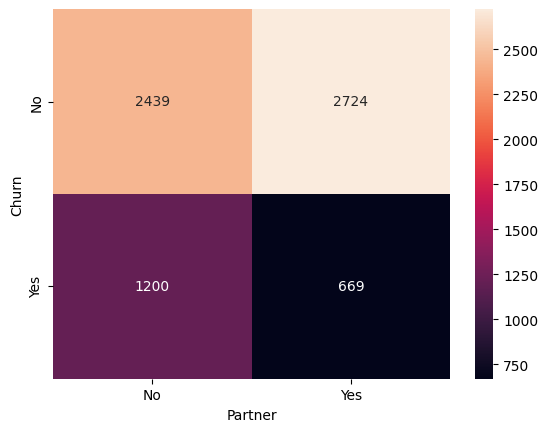

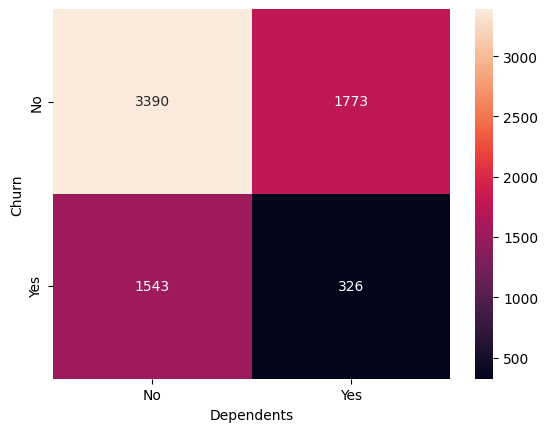

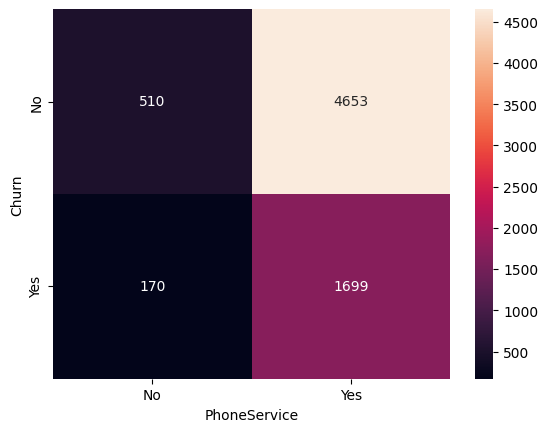

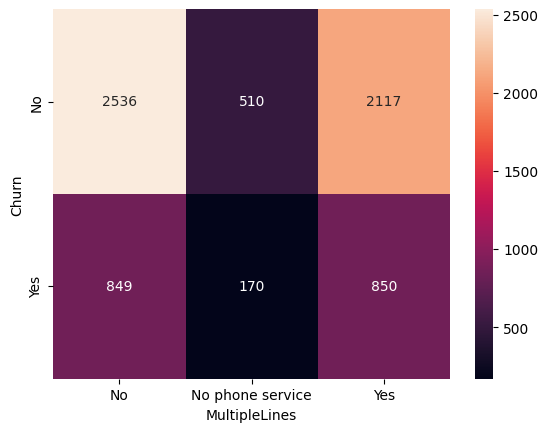

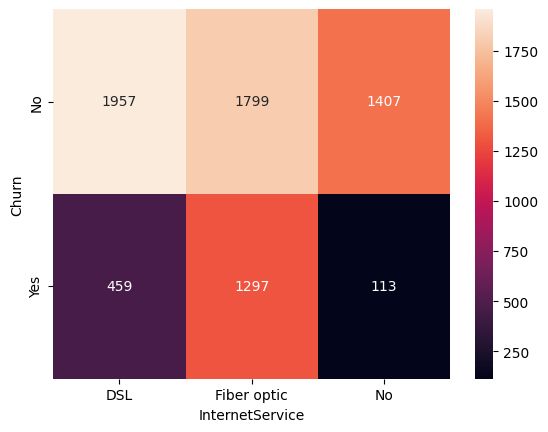

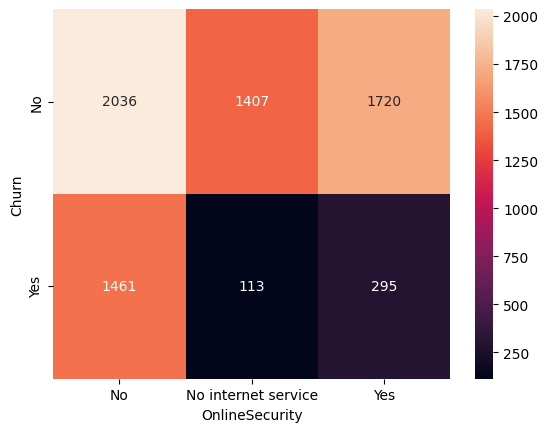

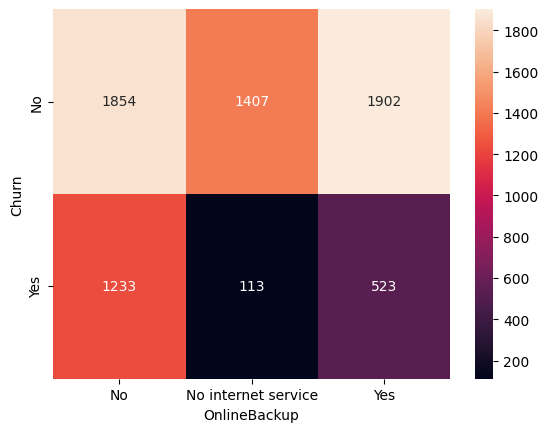

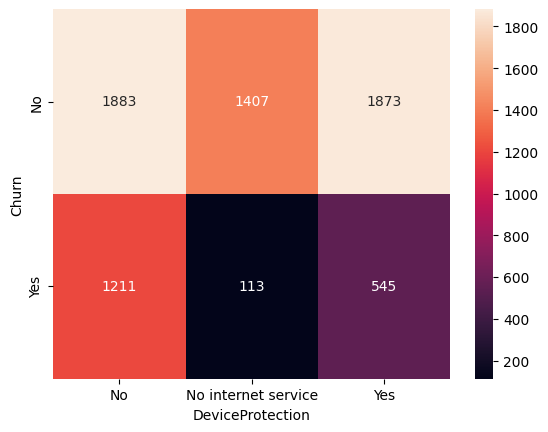

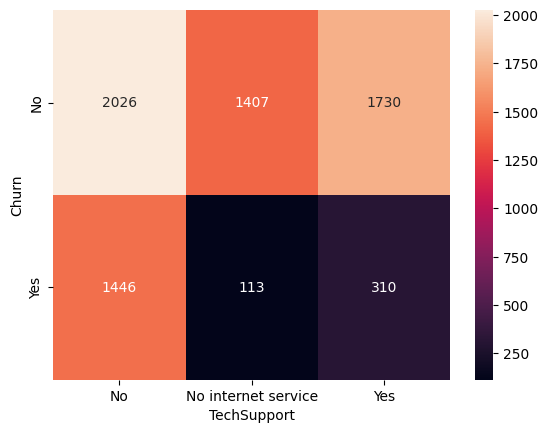

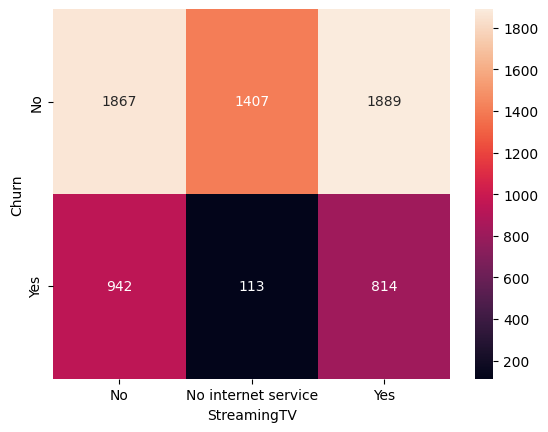

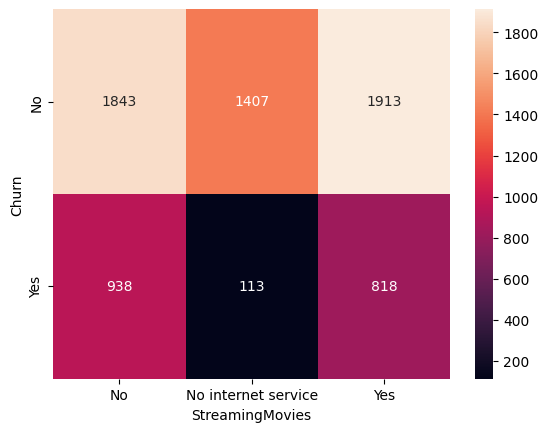

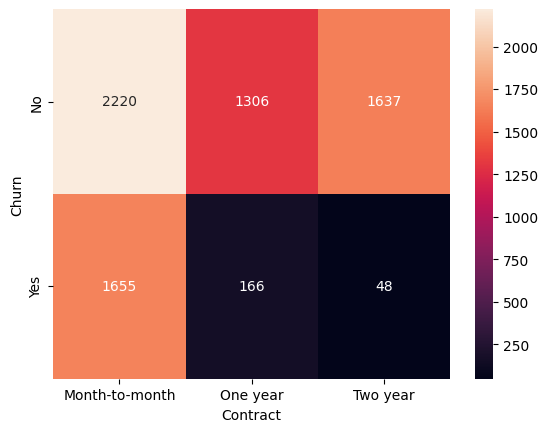

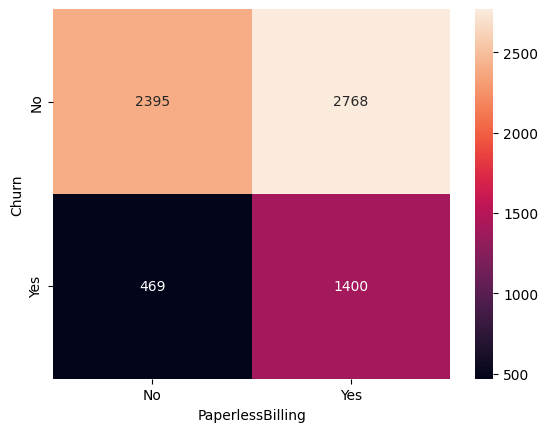

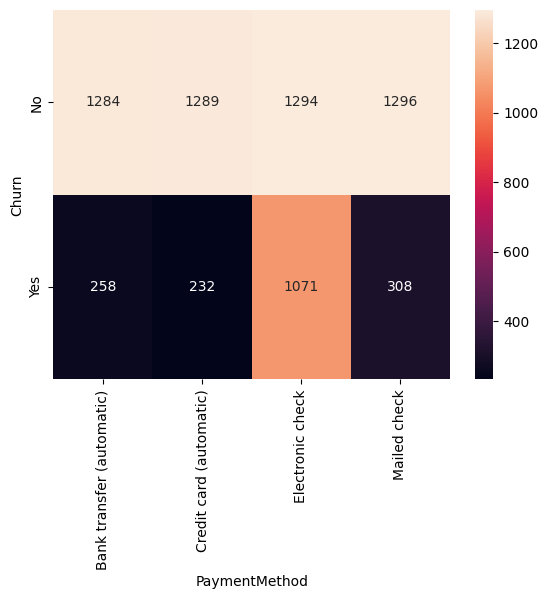

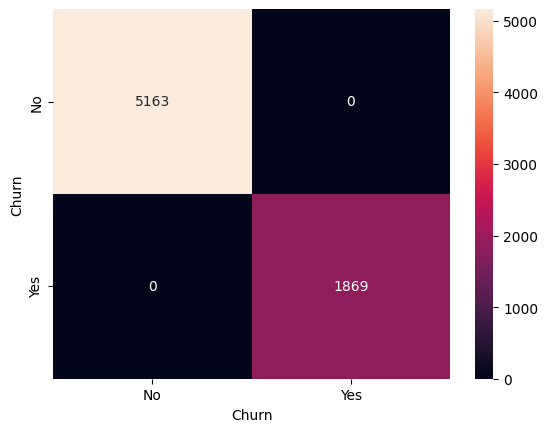

In [28]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['Churn'],df[col]),annot=True,fmt='d')

### More Detailed Analysis

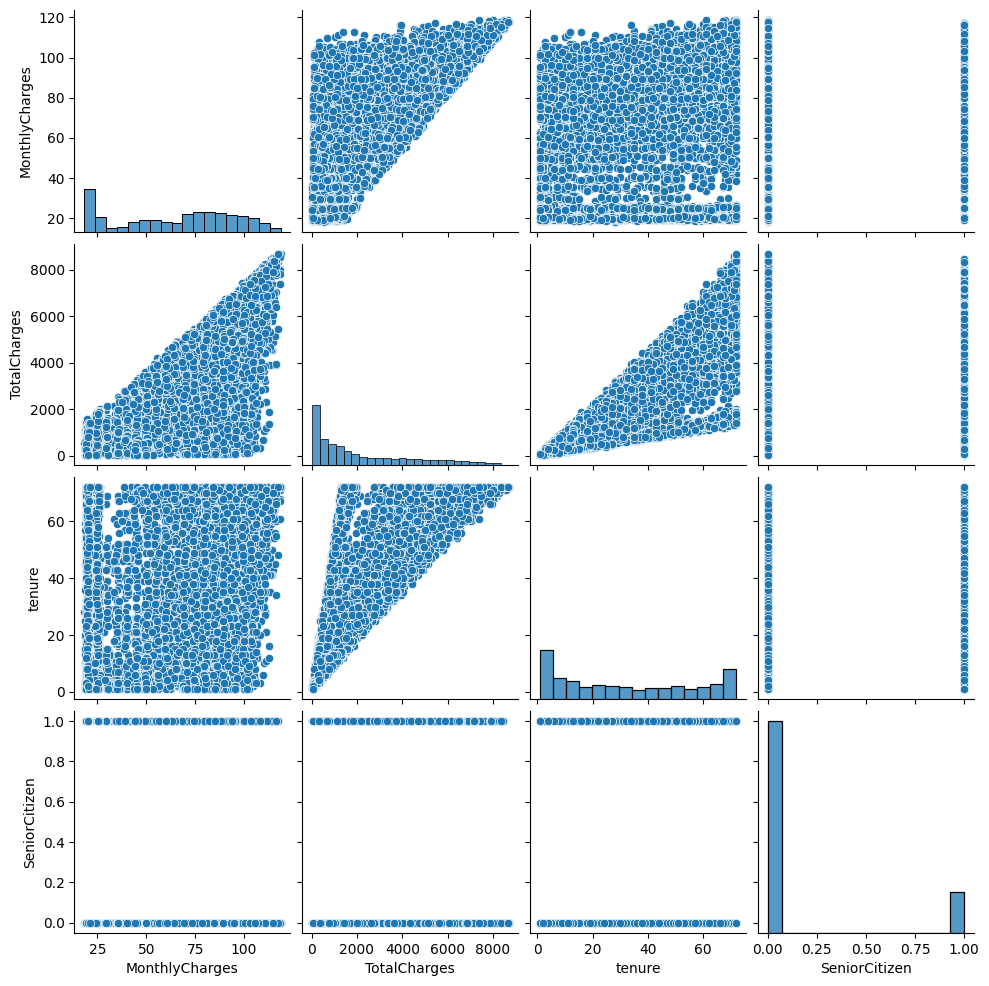

In [29]:
count_columns=["MonthlyCharges","TotalCharges", "tenure" , "SeniorCitizen"]
sns.pairplot(df[count_columns])

<Axes: >

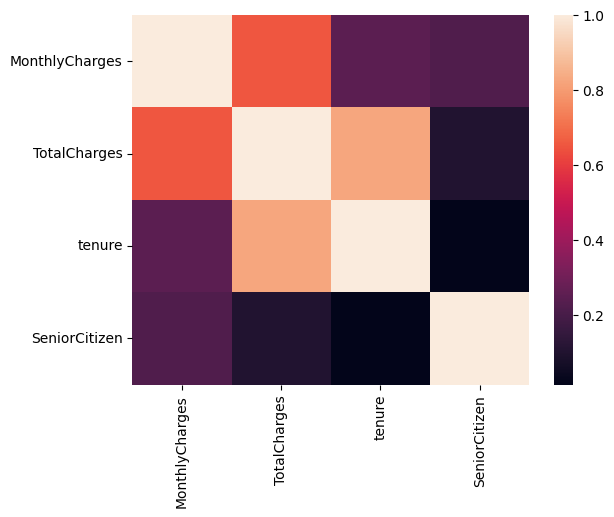

In [30]:
sns.heatmap(df[count_columns].corr())


<Figure size 640x480 with 0 Axes>

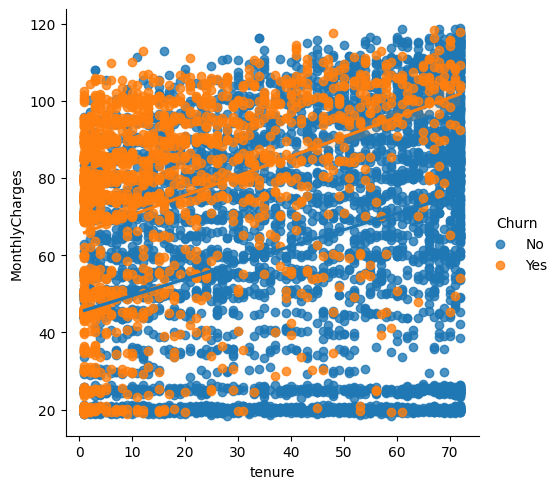

<Figure size 640x480 with 0 Axes>

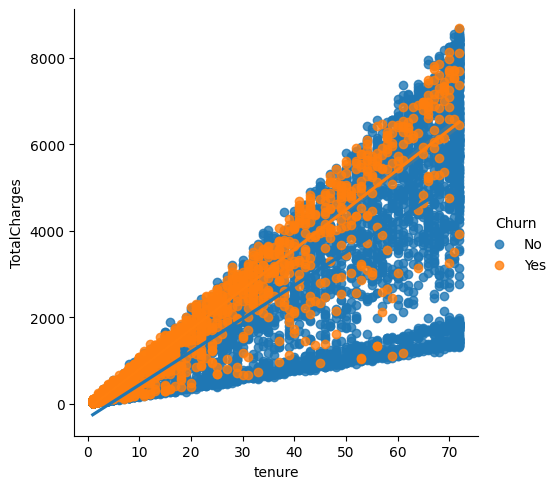

<Figure size 640x480 with 0 Axes>

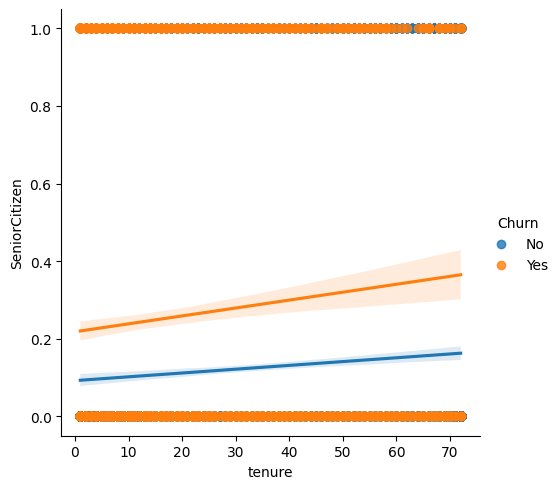

In [31]:
count_columns=["MonthlyCharges","TotalCharges", "SeniorCitizen"]
for col in count_columns:
    plt.figure()
    sns.lmplot(x="tenure",y=col,hue="Churn",data=df)

In [32]:
df.corr(numeric_only=True)["MonthlyCharges"].sort_values()

SeniorCitizen     0.219874
tenure            0.246862
TotalCharges      0.651065
MonthlyCharges    1.000000
Name: MonthlyCharges, dtype: float64

In [33]:
pd.crosstab(df['InternetService'],df['OnlineSecurity'])

OnlineSecurity,No,No internet service,Yes
InternetService,,,
DSL,1240,0,1176
Fiber optic,2257,0,839
No,0,1520,0


In [34]:
pd.crosstab(df['InternetService'],df['DeviceProtection'])

DeviceProtection,No,No internet service,Yes
InternetService,,,
DSL,1355,0,1061
Fiber optic,1739,0,1357
No,0,1520,0


In [35]:
pd.crosstab(df['InternetService'],df['TechSupport'])

TechSupport,No,No internet service,Yes
InternetService,,,
DSL,1242,0,1174
Fiber optic,2230,0,866
No,0,1520,0


In [36]:
pd.crosstab(df['InternetService'],df['StreamingTV'])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1463,0,953
Fiber optic,1346,0,1750
No,0,1520,0


In [37]:
pd.crosstab(df['InternetService'],df['StreamingMovies'])

StreamingMovies,No,No internet service,Yes
InternetService,,,
DSL,1436,0,980
Fiber optic,1345,0,1751
No,0,1520,0


In [38]:
InternetService_columns=["StreamingMovies","StreamingTV","TechSupport","DeviceProtection","OnlineSecurity"]
df[InternetService_columns].head()

,StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineSecurity
0,No,No,No,No,No
1,No,No,No,Yes,Yes
2,No,No,No,No,Yes
3,No,No,Yes,Yes,Yes
4,No,No,No,No,No


In [39]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64